Load Dataset train

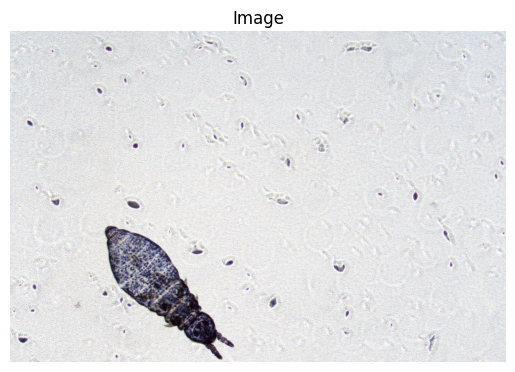

Infos associées : 3_3_3_3 TIDM_URBA/DIJON2021_2/3 0.3294270833333333 0.78125 0.3157552083333333 0.4365234375


In [65]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dossier contenant les données
data_dir = "/Users/axel/Desktop/collemboles_IA/transfer_9489209_files_c610b0aa/data"

# Dictionnaire {id_image: (image, infos_txt)}
data = {}

# Parcours du dossier
for filename in os.listdir(data_dir):
    if filename.endswith(".jpg"):
        img_id = filename.replace(".jpg", "")
        img_path = os.path.join(data_dir, filename)
        txt_path = os.path.join(data_dir, f"{img_id}.txt")
        
        # Chargement image
        image = Image.open(img_path).convert("RGB")
        
        # Lecture du fichier texte
        with open(txt_path, 'r') as f:
            infos = f.read().strip()
        
        data[img_id] = (image, infos)

# ID cible à afficher
target_id = "0.24464457081350.88336921705746710.18602568807154019"

# Affichage
if target_id in data:
    img, txt = data[target_id]
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image")
    plt.show()
    print("Infos associées :", txt)
else:
    print("Image non trouvée.")

Load data test

In [66]:
import fiftyone as fo

# On charge le dataset existant
dataset = fo.load_dataset("collembolas")

unanimous_ids = []

for sample in dataset:
    # Pour éviter les soucis, on vérifie que chaque expert
    # ait le même nombre de boxes
    nb1 = len(sample.expert1.detections)
    nb2 = len(sample.expert2.detections)
    nb3 = len(sample.expert3.detections)
    nb4 = len(sample.expert4.detections)
    
    if nb1 == nb2 == nb3 == nb4:
        all_unanimous = True
        for i in range(nb1):
            e1 = sample.expert1.detections[i].label
            e2 = sample.expert2.detections[i].label
            e3 = sample.expert3.detections[i].label
            e4 = sample.expert4.detections[i].label
            
            if not (e1 == e2 == e3 == e4):
                all_unanimous = False
                break
        
        if all_unanimous:
            unanimous_ids.append(sample.id)

# On crée une vue avec uniquement les images unanimes
view = dataset.select(unanimous_ids)

# On lance FiftyOne sur cette vue filtrée
session = fo.launch_app(view)

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port


Split pour les images du train

In [68]:
dataset

Name:        collembolas
Media type:  image
Num samples: 1117
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    boxes:            fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    expert1:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    expert2:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    expert3:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    expert4:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.l

In [67]:
def regrouper_projets(projet):
    if "Howécourt" in projet:
        return "Howécourt"
    elif "Bioindicateur" in projet:
        return "Bioindicateur"
    elif "Bretagne" in projet:
        return "Bretagne"
    elif "Celine Isacs" in projet:
        return "Celine Isacs"
    elif "Ecopic" in projet:
        return "Ecopic"
    elif "NARBONS" in projet:
        return "NARBONS"
    elif "PEY" in projet:
        return "PEY"
    elif "Parcelles" in projet:
        return "Parcelles"
    elif "Pompey_1" in projet:
        return "Pompey_1"
    elif "RMQS" in projet:
        return "RMQS"
    elif "TIDM_URBA/DIJON" in projet:
        return "TIDM_URBA/DIJON"
    elif "VADEBIO" in projet or "Vadebio" in projet:
        return "VADEBIO"
    elif projet.strip().lower() == "nd":
        return "nd"
    else:
        return "Autre"

# Application
data['projet_famille'] = data['projet'].apply(regrouper_projets)

# Résumé
print(data['projet_famille'].value_counts().sort_index())

KeyError: 'projet'

In [16]:
# Total général
total_lignes = len(df)

# Somme par famille de projet
par_famille = df['projet_famille'].value_counts().sort_index()

# Affichage
print("Nombre total de lignes :", total_lignes)
print("\nLignes par famille de projet :\n")
print(par_famille)

# Vérif : somme des familles = total ?
print("\nVérification : somme des familles =", par_famille.sum())

Nombre total de lignes : 1396

Lignes par famille de projet :

projet_famille
Bioindicateur                       330
Bretagne                              6
Celine Isacs Litière boite rouge      1
Ecopic                              117
Howécourt                             9
NARBONS                              17
PEY                                  18
Parcelles                            52
Pompey_1                            184
RMQS                                 30
TIDM_URBA/DIJON                     572
VADEBIO                              57
nd                                    3
Name: count, dtype: int64

Vérification : somme des familles = 1396


In [17]:
df_par_projet = df['projet_famille'].value_counts().sort_index()
print(df_par_projet)

projet_famille
Bioindicateur                       330
Bretagne                              6
Celine Isacs Litière boite rouge      1
Ecopic                              117
Howécourt                             9
NARBONS                              17
PEY                                  18
Parcelles                            52
Pompey_1                            184
RMQS                                 30
TIDM_URBA/DIJON                     572
VADEBIO                              57
nd                                    3
Name: count, dtype: int64


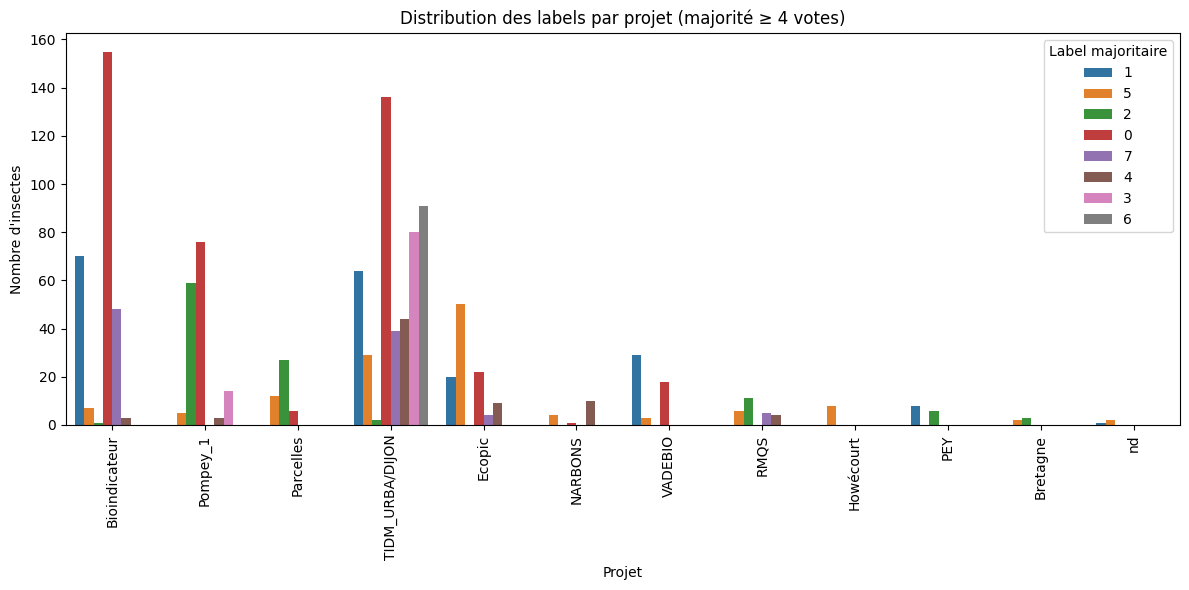

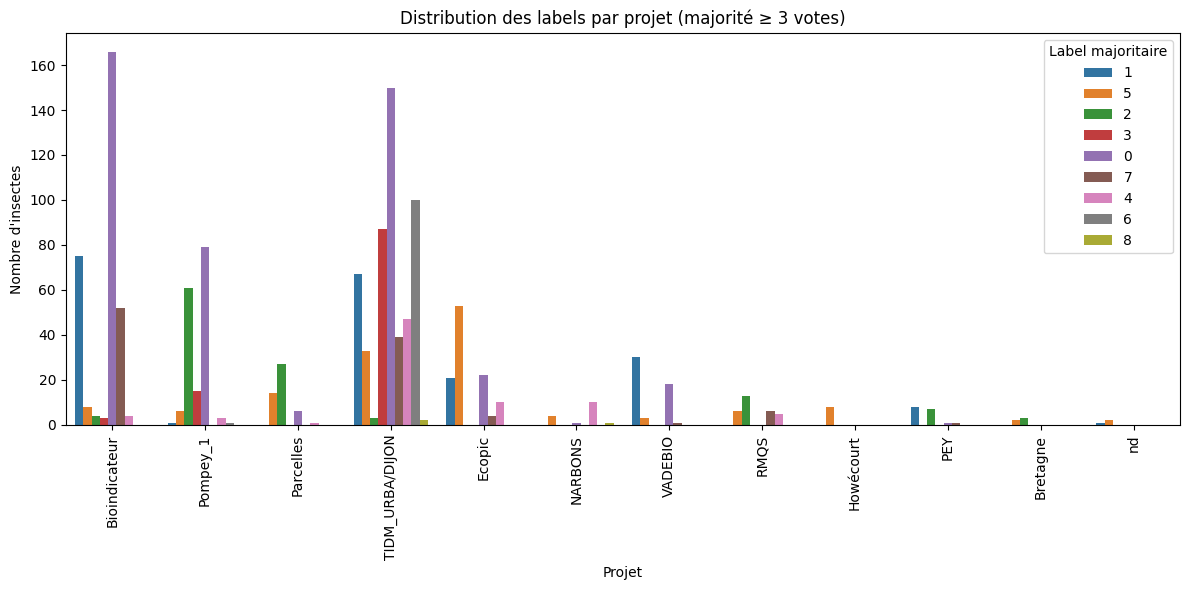

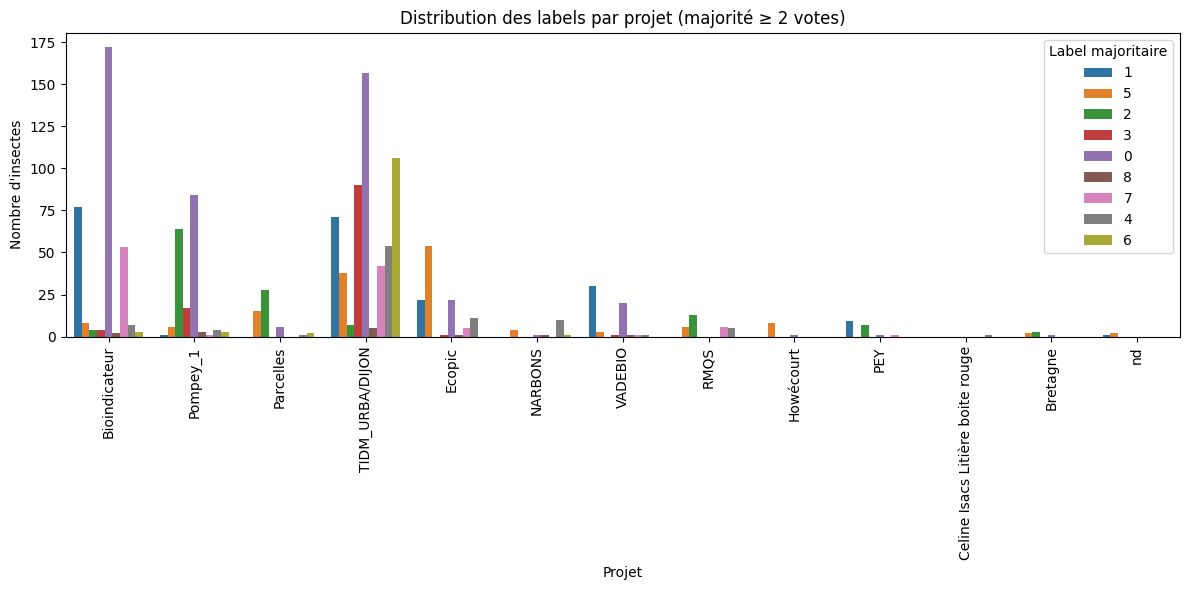

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour déterminer le label majoritaire selon un seuil
def label_majoritaire(row, seuil):
    labels = [row['labels_E1'], row['labels_E2'], row['labels_E3'], row['labels_E4']]
    counts = pd.Series(labels).value_counts()
    if counts.iloc[0] >= seuil:
        return counts.index[0]
    else:
        return None

# Appliquer pour chaque seuil
for seuil in [4, 3, 2]:
    df[f'label_majoritaire_{seuil}'] = df.apply(lambda row: label_majoritaire(row, seuil), axis=1)

    # Filtrer les lignes avec un label majoritaire
    df_majoritaire = df[df[f'label_majoritaire_{seuil}'].notnull()]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_majoritaire, x='projet_famille', hue=f'label_majoritaire_{seuil}')
    plt.xticks(rotation=90)
    plt.title(f'Distribution des labels par projet (majorité ≥ {seuil} votes)')
    plt.xlabel('Projet')
    plt.ylabel('Nombre d\'insectes')
    plt.legend(title='Label majoritaire')
    plt.tight_layout()
    plt.show()

In [63]:
import os
import pandas as pd
import plotly.express as px

# Dossier contenant les fichiers .txt
txt_dir = "/Users/axel/Desktop/collemboles_IA/transfer_9489209_files_c610b0aa/data"

# Lister tous les fichiers .txt
txt_files = [f for f in os.listdir(txt_dir) if f.endswith(".txt")]

# Pour chaque fichier, compter le nombre de lignes (donc d'insectes)
data = []
for filename in txt_files:
    path = os.path.join(txt_dir, filename)
    with open(path, "r", encoding="utf-8") as f:
        lines = [line for line in f.read().splitlines() if line.strip()]
        data.append({"image_id": filename.replace(".txt", ""), "nb_insectes": len(lines)})

# Création du DataFrame
df_txt = pd.DataFrame(data)

# Comptage des images par nombre d'insectes
df_count = df_txt.groupby("nb_insectes").size().reset_index(name="count")

# Calcul du pourcentage
total_images = df_count["count"].sum()
df_count["%"] = round(df_count["count"] / total_images * 100, 1)
df_count["label"] = df_count["count"].astype(str) + " (" + df_count["%"].astype(str) + "%)"

# Affichage avec Plotly
fig = px.bar(
    df_count,
    x="nb_insectes",
    y="count",
    text="label",
    labels={"nb_insectes": "Nombre d'insectes par image", "count": "Nombre d'images"},
    title="Distribution du nombre d'insectes par image (basée sur les fichiers .txt)",
    color_discrete_sequence=["#545454"]
)

fig.update_traces(textposition="outside")
fig.update_layout(
    bargap=0.5,
    width=1000,
    height=500,
    template="simple_white",
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
)

fig.show()

In [64]:
import plotly.express as px

# Ajouter la colonne surface si ce n’est pas déjà fait
df["surface"] = df["width"] * df["height"]

# Boxplot interactif avec Plotly
fig = px.box(
    df,
    x="projet_famille",
    y="surface",
    points="outliers",  # Pour afficher les points aberrants
    title="Distribution des surfaces (pixels) des boxs par projet",
    labels={"projet_famille": "Projet", "surface": "Surface relative (width × height)"}, 
    color_discrete_sequence=["#545454"]
)

fig.update_layout(
    xaxis_title="Projet",
    yaxis_title="Surface relative",
    width=1200,
    height=500,
    template="simple_white"
)

fig.update_xaxes(tickangle=45)  # Rotation pour lisibilité

fig.show()

In [41]:
import pandas as pd
import plotly.express as px
from collections import Counter

# Fonction pour compter le niveau d'accord pour un insecte
def niveau_accord(row):
    labels = [row['labels_E1'], row['labels_E2'], row['labels_E3'], row['labels_E4']]
    counts = Counter(labels).most_common(1)[0][1]
    return counts

# Appliquer à chaque ligne (insecte)
df["niveau_accord"] = df.apply(niveau_accord, axis=1)

# Pour chaque image, retenir le niveau d'accord le plus élevé observé
df_image_niveau = df.groupby("image_id")["niveau_accord"].max().reset_index()

# Regrouper les images par niveau d'accord
accord_counts = df_image_niveau["niveau_accord"].value_counts().reindex([4, 3, 2, 1], fill_value=0).reset_index()
accord_counts.columns = ["Niveau d'accord", "Nombre d'images"]

# Ajouter les pourcentages
total_images = df_image_niveau.shape[0]
accord_counts["%"] = round((accord_counts["Nombre d'images"] / total_images) * 100, 1)
accord_counts["label"] = accord_counts["Nombre d'images"].astype(str) + " (" + accord_counts["%"].astype(str) + "%)"

# Graphique
fig = px.bar(
    accord_counts,
    x="Niveau d'accord",
    y="Nombre d'images",
    text="label",
    labels={"Niveau d'accord": "Nombre d'experts d'accord", "Nombre d'images": "Nombre d'images"},
    title="Accord entre experts par image", 
    color_discrete_sequence=["#545454"]
)

fig.update_traces(textposition="outside")
fig.update_layout(
    bargap=0.6,
    width=800,
    height=500,
    template="simple_white",
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis=dict(
        tickmode="array",
        tickvals=[1, 2, 3, 4]  # affichage X en entiers uniquement
    )
)

fig.show()

In [43]:
import statistics

def majority_label(row):
    # Récupère la liste des labels
    labels = [row["labels_E1"], row["labels_E2"], row["labels_E3"], row["labels_E4"]]
    # statistics.multimode renvoie tous les modes ; on prend le premier en cas de tie
    mode = statistics.multimode(labels)
    return mode[0]

# Calcul du label majoritaire pour chaque insecte
df["majority_label"] = df.apply(majority_label, axis=1)

# Calcul du taux d'accord par expert avec le label majoritaire
agree_E1 = (df["labels_E1"] == df["majority_label"]).mean() * 100
agree_E2 = (df["labels_E2"] == df["majority_label"]).mean() * 100
agree_E3 = (df["labels_E3"] == df["majority_label"]).mean() * 100
agree_E4 = (df["labels_E4"] == df["majority_label"]).mean() * 100

agreement = pd.DataFrame({
    "Expert": ["E1", "E2", "E3", "E4"],
    "Agreement (%)": [agree_E1, agree_E2, agree_E3, agree_E4]
})

agreement = agreement.sort_values(by="Agreement (%)")
print("Pourcentage d'accord de chaque expert avec la majorité :")
print(agreement)

Pourcentage d'accord de chaque expert avec la majorité :
  Expert  Agreement (%)
3     E4      92.693410
2     E3      94.340974
1     E2      94.985673
0     E1      96.203438


/var/folders/tb/ydg53kwn3bs7hz_m0vxtdn200000gn/T/ipykernel_83735/2219971928.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




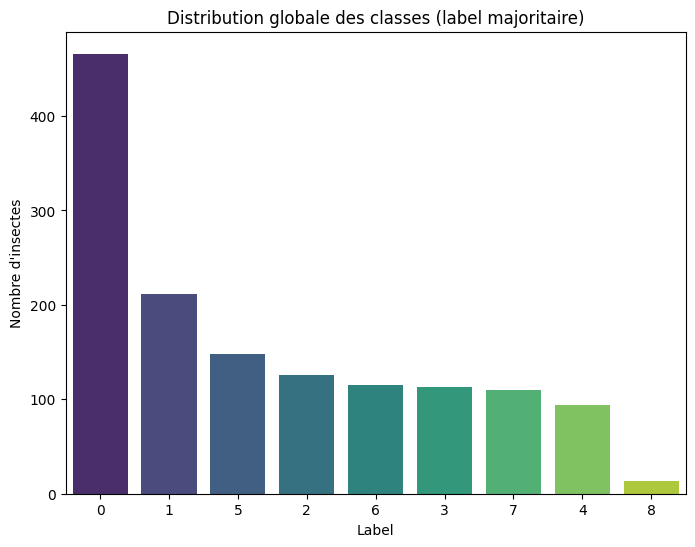

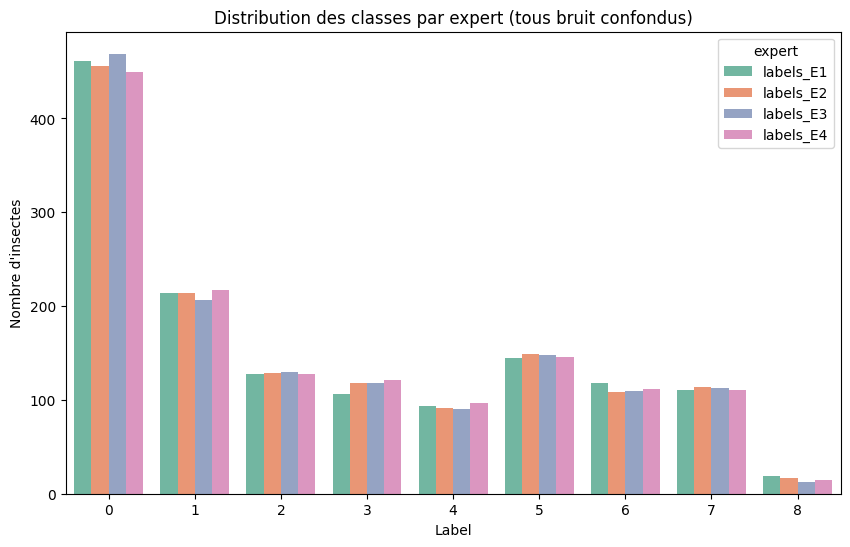

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regroupement par label majoritaire (sans bruit)
dist_majority = df["majority_label"].value_counts().reset_index()
dist_majority.columns = ["majority_label", "count"]

plt.figure(figsize=(8, 6))
sns.barplot(x="majority_label", y="count", data=dist_majority, palette="viridis")
plt.title("Distribution globale des classes (label majoritaire)")
plt.xlabel("Label")
plt.ylabel("Nombre d'insectes")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Transformation pour empiler les colonnes d'experts
df_experts = df.melt(value_vars=["labels_E1", "labels_E2", "labels_E3", "labels_E4"],
                     var_name="expert", value_name="label")

# Comptage
dist_experts = df_experts.groupby(["label", "expert"]).size().reset_index(name="count")

# Graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=dist_experts, x="label", y="count", hue="expert", palette="Set2")
plt.title("Distribution des classes par expert (tous bruit confondus)")
plt.xlabel("Label")
plt.ylabel("Nombre d'insectes")
plt.show()

Distribution du nombre d'experts en accord pour chaque insecte :
   nb_experts_en_accord  nb_insectes  proportion (%)
0                     1            4        0.286533
1                     2           97        6.948424
2                     3           98        7.020057
3                     4         1197       85.744986


/var/folders/tb/ydg53kwn3bs7hz_m0vxtdn200000gn/T/ipykernel_57288/1160240188.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="nb_experts_en_accord", y="proportion (%)", data=agreement_dist, palette="Blues_d")


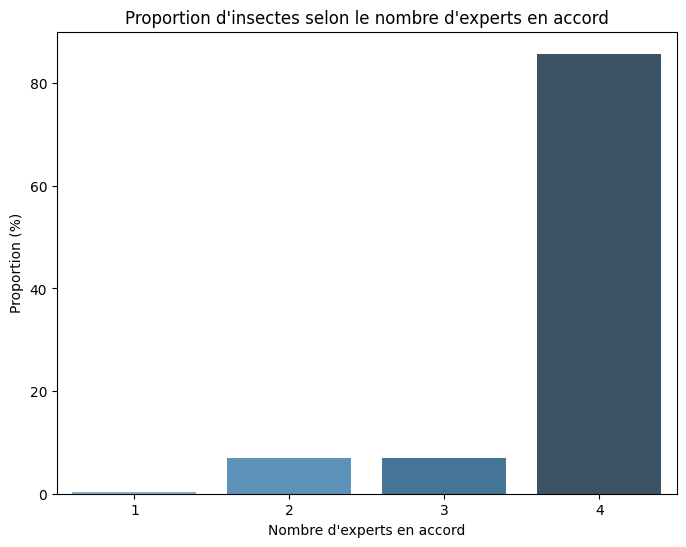

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pour chaque insecte, on calcule le nombre maximum d'experts en accord
def max_agreement(row):
    labels = [row["labels_E1"], row["labels_E2"], row["labels_E3"], row["labels_E4"]]
    # On calcule la fréquence de chaque label et on retourne le maximum
    return pd.Series(labels).value_counts().max()

df["max_agree_count"] = df.apply(max_agreement, axis=1)

# Calcul de la distribution
agreement_dist = df["max_agree_count"].value_counts().sort_index().reset_index()
agreement_dist.columns = ["nb_experts_en_accord", "nb_insectes"]
agreement_dist["proportion (%)"] = agreement_dist["nb_insectes"] / len(df) * 100

print("Distribution du nombre d'experts en accord pour chaque insecte :")
print(agreement_dist)

# Visualisation
plt.figure(figsize=(8,6))
sns.barplot(x="nb_experts_en_accord", y="proportion (%)", data=agreement_dist, palette="Blues_d")
plt.xlabel("Nombre d'experts en accord")
plt.ylabel("Proportion (%)")
plt.title("Proportion d'insectes selon le nombre d'experts en accord")
plt.show()

In [45]:
# Regrouper par image pour compter le nombre d'insectes
images_few_insects = df.groupby("image_id").size().reset_index(name="nb_insectes")
images_few_insects = images_few_insects[images_few_insects["nb_insectes"] <= 6]

# Affichage des ID
print("Images avec 6 insectes ou moins :")
print(images_few_insects["image_id"].tolist())

Images avec 6 insectes ou moins :
['0.00103249727675203130.23677820798415050.7050857562244466', '0.0019854243295879260.0286276958653508550.8295731456053279', '0.0055826482360382680.53755056558076890.18776955126042416', '0.0056082525335631180.072100167826147480.09500857266085416', '0.0062818188617491670.212919715903530540.6610598052788744', '0.0069778011887373650.75257420572119340.1550402409754622', '0.0070485065477940980.94112363507268160.5859213863934372', '0.0074742280075711380.427713586126560740.9264751307288239', '0.0091882481198156670.60732313076353240.08772842891979549', '0.0092409317605512960.56568978481236850.1311803077047763', '0.0095964631074969550.94094687882068070.7708758680570287', '0.0101547280619290750.53887719406129960.2958450396784177', '0.0116158256987709540.091583639279747440.4964098795096855', '0.0128014996016426740.256021255105425060.5962162837850934', '0.0128848337894155170.13444270497576860.46458342599501423', '0.0133302695087518240.100766409280307670.45655909206

In [46]:
import os

# Images avec 6 insectes ou moins
images_few_insects = df.groupby("image_id").size().reset_index(name="nb_insectes")
images_few_insects = images_few_insects[images_few_insects["nb_insectes"] <= 6]
image_ids = images_few_insects["image_id"].tolist()

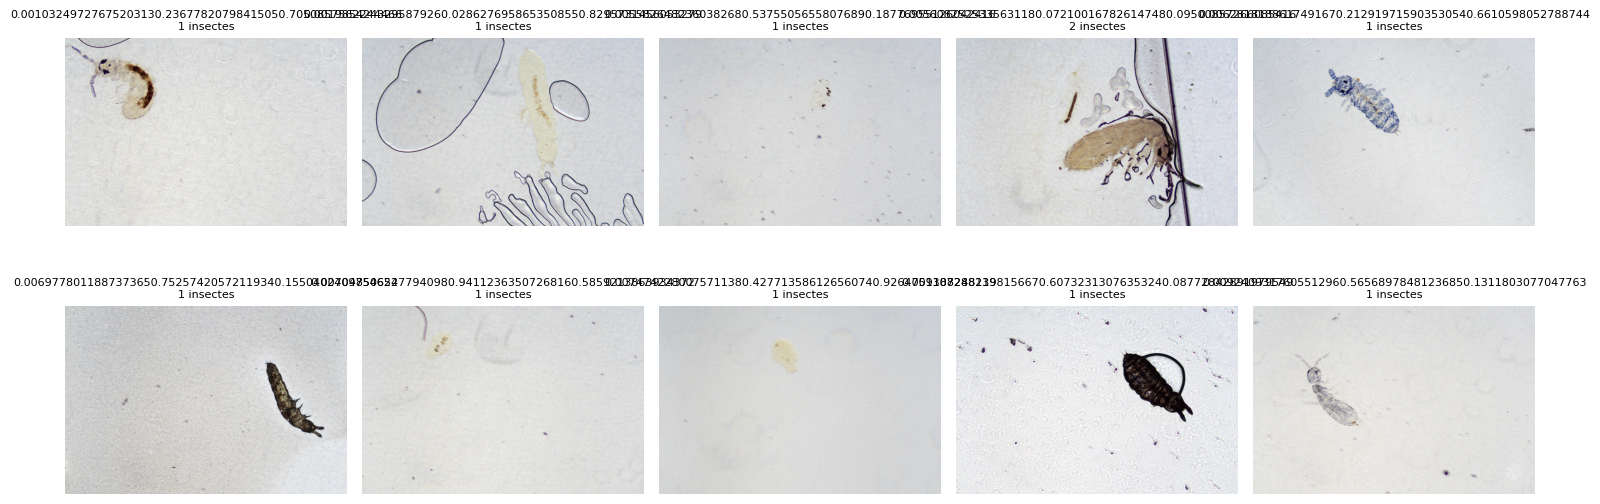

In [51]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dossier des images
image_dir = "/Users/axel/Desktop/collemboles_IA/transfer_9489209_files_c610b0aa/data"

# Récupérer les image_id avec ≤ 6 insectes + leur nombre
images_few_insects = df.groupby("image_id").size().reset_index(name="nb_insectes")
images_few_insects = images_few_insects[images_few_insects["nb_insectes"] <= 6]
image_ids = images_few_insects["image_id"].tolist()

# Pour accès rapide au nb d'insectes par image_id
id_to_count = dict(zip(images_few_insects["image_id"], images_few_insects["nb_insectes"]))

# === Pagination ===
images_per_page = 10
start_idx = 0  # <-- modifie ici pour naviguer

# Sous-liste à afficher
sub_image_ids = image_ids[start_idx:start_idx + images_per_page]

# Création du subplot
cols = 5
rows = (len(sub_image_ids) + cols - 1) // cols
plt.figure(figsize=(cols * 3, rows * 3))

for i, image_id in enumerate(sub_image_ids):
    img_path = os.path.join(image_dir, f"{image_id}.jpg")
    
    if not os.path.exists(img_path):
        print(f"Image non trouvée : {img_path}")
        continue

    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    nb = id_to_count.get(image_id, "?")
    plt.title(f"{image_id}\n{nb} insectes", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

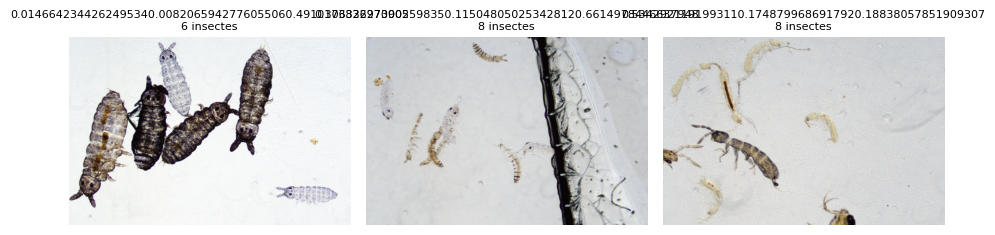

In [55]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dossier des images
image_dir = "/Users/axel/Desktop/collemboles_IA/transfer_9489209_files_c610b0aa/data"

# Récupérer les image_id avec > 6 insectes + leur nombre
images_many_insects = df.groupby("image_id").size().reset_index(name="nb_insectes")
images_many_insects = images_many_insects[images_many_insects["nb_insectes"] >= 6]
image_ids = images_many_insects["image_id"].tolist()

# Pour accès rapide au nb d'insectes par image_id
id_to_count = dict(zip(images_many_insects["image_id"], images_many_insects["nb_insectes"]))

# === Pagination ===
images_per_page = 10
start_idx = 0  # <-- modifie ici pour afficher les suivantes

# Sous-liste à afficher
sub_image_ids = image_ids[start_idx:start_idx + images_per_page]

# Création du subplot
cols = 5
rows = (len(sub_image_ids) + cols - 1) // cols
plt.figure(figsize=(cols * 3, rows * 3))

for i, image_id in enumerate(sub_image_ids):
    img_path = os.path.join(image_dir, f"{image_id}.jpg")
    
    if not os.path.exists(img_path):
        print(f"Image non trouvée : {img_path}")
        continue

    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    nb = id_to_count.get(image_id, "?")
    plt.title(f"{image_id}\n{nb} insectes", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()